# Implementing Machine Learning Applications in Pyspark environment: Financial Case

Haluk Erhan, McMaster, 2019

## Case Statement

A leading financial bank is trying to broaden the financial inclusion for the unbanked population by proving a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience; it makes use of variety of alternative data—including telco and transactional information—to predict their clients’ repayment abilities.

The problem is to develop a solution to ensure that the clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. 


## Setting Up Environment

Based on the operating system, we can choose the option to install
Spark on the system.

* Java Installation

* Spark Installation

* Edit environment variables for your account.


In [30]:
import findspark
findspark.init()

findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

Print environment variables inside jupyter notebook.

In [31]:
import os
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
print(os.environ['PATH'])

C:\spark\spark-2.4.3-bin-hadoop2.7
C:\Program Files\Java\jdk1.8.0_221
C:\Users\haluk\Anaconda3;C:\Users\haluk\Anaconda3\Library\mingw-w64\bin;C:\Users\haluk\Anaconda3\Library\usr\bin;C:\Users\haluk\Anaconda3\Library\bin;C:\Users\haluk\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Java\jdk1.8.0_221\bin;C:\spark\spark-2.4.3-bin-hadoop2.7\bin;


Spark Components

* Spark SQL (used in project)
* Spark Streaming
* Spark MLlib (usel in project)
* GraphX

Firt we will use Spark SQL

This component mainly deals with structured data processing. The key
idea is to fetch more information about the structure of the data to perform
additional optimization. It can be considered a distributed SQL query
engine.

In [32]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('random_forest').getOrCreate()

In [33]:
#OTHER REQUIRED PACKAGES
import pandas as pd
from functools import reduce
import time

In [34]:
start_time = time.time()
df=spark.read.csv('E:\\BDA 105\\Files\\Dataset.csv', inferSchema=True, header=False, sep=',')
elapsed_time = time.time() - start_time
print (elapsed_time, 'sec')


0.4697439670562744 sec


In [35]:
df.printSchema() 

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: integer (nullable = true)
 |-- _c14: integer (nullable = true)
 |-- _c15: integer (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: integer (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: integer (nullable = true)
 |-- _c22: integer (nullable = true)
 |-- _c23: integer (nullable = true)
 |-- _c24: integer (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: integer (nullable = true)
 |-- _c27: integer 

The nullable property indicates if the corresponding column can assume null values (true) or not (false).

In [36]:
col_names=pd.read_excel('E:\\BDA 105\\Files\\Dataset_Metadata.xlsx')

oldColumns=df.schema.names
newColumns=col_names['Dataset Metadata']

With below code we are converting old column names with the ones given in metadata file. 

In [37]:
df = reduce(lambda data, idx: data.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), df)

In [38]:
df.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- OWN_CAR_AGE: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_EMP_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_CONT_MOBILE: integer (nullable = true)
 |-- FLAG_PHONE: double (nullable = true)
 |-- OCCUPATION_TYPE: integer (nul

In [39]:
df.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10']

In [40]:
df.select('REG_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE').show(3)

+--------------------------+--------------------+
|REG_REGION_NOT_WORK_REGION|   ORGANIZATION_TYPE|
+--------------------------+--------------------+
|                         0|Business Entity T...|
|                         0|              School|
|                         0|          Government|
+--------------------------+--------------------+
only showing top 3 rows



In [41]:
df.select('NAME_CONTRACT_TYPE').distinct().show()

+------------------+
|NAME_CONTRACT_TYPE|
+------------------+
|   Revolving loans|
|        Cash loans|
+------------------+



In [42]:
df.describe().select('summary','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY').show()

+-------+------------------+------------------+------------------+------------------+
|summary|NAME_CONTRACT_TYPE|  AMT_INCOME_TOTAL|        AMT_CREDIT|       AMT_ANNUITY|
+-------+------------------+------------------+------------------+------------------+
|  count|            307497|            307497|            307497|            307497|
|   mean|              null| 168796.2092668709| 599027.0918984575| 27108.54534678387|
| stddev|              null|237127.59094150367|402493.94600611844|14493.778986791332|
|    min|        Cash loans|           25650.0|           45000.0|            1615.5|
|    max|   Revolving loans|            1.17E8|         4050000.0|          258025.5|
+-------+------------------+------------------+------------------+------------------+



In [43]:
df.groupBy('NAME_CONTRACT_TYPE').count().show()

+------------------+------+
|NAME_CONTRACT_TYPE| count|
+------------------+------+
|   Revolving loans| 29277|
|        Cash loans|278220|
+------------------+------+



Writing data as parquest file for future usage

Since the dataset is huge and involves a lot of columns, we can choose to
compress it and convert it into a parquet file format. It reduces the overall
size of the data and optimizes the performance while processing data
because it works on subsets of required columns instead of the entire data. 

In [44]:
parquet_path='E:\\BDA 105\\Files\\df_parquet'

In [45]:
#df.write.format('parquet').save(parquet_path)

# Data Processing and Feature Engineering

Data processing is a critical step required to perform Machine
Learning as we need to clean, filter, merge, and transform our data to bring
it to the desired form so that we are able to train Machine Learning models.
We will make use of multiple PySpark functions to perform data processing.

Since machine learning models only consume data in a
numerical format, we have to adopt some technique to convert the
categorical data in a numerical form.

This is the part where we convert the categorical variable into numerical
form and create a single vector combining all the input features by using
Spark’s VectorAssembler.

The process includes Category Indexing, One-Hot Encoding and VectorAssembler a feature transformer that merges multiple columns into a vector column.

In [46]:
from pyspark.sql.functions import isnan, when, count, col

In [47]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder


Dummy Variables

Since machine learning models only consume data in a
numerical format, we have to adopt some technique to convert the
categorical data in a numerical form. We have to convert  into a numerical format using
dummification. As a result, we would get an additional number of dummy
variables (columns), which would be equal to the number of distinct
categories. 

The whole idea is to represent the same information in a different
manner so that the Machine Learning model can learn from categorical
values as well.



The first step is to label the column using StringIndexer into
numerical form. It allocates unique values to each of the categories of the
column.

NAME_CONTRACT_TYPE: Identification if loan is cash or revloving

In [48]:
df.filter(df['NAME_CONTRACT_TYPE'].isNull()).count()

0

In [49]:
NCT_indexer=StringIndexer(inputCol='NAME_CONTRACT_TYPE', outputCol='NCT').fit(df)
df=NCT_indexer.transform(df)
df.select('NAME_CONTRACT_TYPE','NCT').distinct().show()

+------------------+---+
|NAME_CONTRACT_TYPE|NCT|
+------------------+---+
|   Revolving loans|1.0|
|        Cash loans|0.0|
+------------------+---+



The next step is to represent each of these values into the form of a
one hot encoded vector. However, this vector is a little different in terms of
representation as it captures the values and position of the values in the vector.

In [50]:
NCT_encoder=OneHotEncoder(inputCol="NCT", outputCol="NCT_Vector")

In [51]:
df = NCT_encoder.transform(df)

In [52]:
df.select('NAME_CONTRACT_TYPE','NCT','NCT_Vector').distinct().show()

+------------------+---+-------------+
|NAME_CONTRACT_TYPE|NCT|   NCT_Vector|
+------------------+---+-------------+
|   Revolving loans|1.0|    (1,[],[])|
|        Cash loans|0.0|(1,[0],[1.0])|
+------------------+---+-------------+



The final feature that we would be using for building Logistic
Regression is NCT_Vector. 

Cash Loans
* 1 : size of vector
* 0 :value contained in vector
* 1.0 : position of value in vector

This kind of representation allows the saving of computational space
and hence a faster time to compute. The length of the vector is equal to
one less than the total number of elements since each value can be easily
represented with just the help of two columns.

CODE_GENDER: Gender of client

In [53]:
df.filter(df['CODE_GENDER'].isNull()).count()

0

In [54]:
df.select('CODE_GENDER').distinct().show()

+-----------+
|CODE_GENDER|
+-----------+
|          F|
|          M|
|        XNA|
+-----------+



We have some XNA value which do not correspont with gender data. Let's deal with them. 

In [55]:
df.filter(df['CODE_GENDER']=='XNA').count()

4

Since the number of irreklevant data is low we can treat them by dropping. 

In [56]:
df=df.filter(df['CODE_GENDER']!='XNA')

In [57]:
GENDER_indexer=StringIndexer(inputCol='CODE_GENDER', outputCol='GENDER').fit(df)
df=GENDER_indexer.transform(df)
df.select('CODE_GENDER','GENDER').distinct().show()

+-----------+------+
|CODE_GENDER|GENDER|
+-----------+------+
|          M|   1.0|
|          F|   0.0|
+-----------+------+



In [58]:
GENDER_encoder=OneHotEncoder(inputCol="GENDER", outputCol="GENDER_Vector")
df = GENDER_encoder.transform(df)
df.select('CODE_GENDER','GENDER','GENDER_Vector').distinct().show()

+-----------+------+-------------+
|CODE_GENDER|GENDER|GENDER_Vector|
+-----------+------+-------------+
|          M|   1.0|    (1,[],[])|
|          F|   0.0|(1,[0],[1.0])|
+-----------+------+-------------+



FLAG_OWN_CAR: Flag if the client owns the car

In [59]:
df.filter(df['FLAG_OWN_CAR'].isNull()).count()

0

In [60]:
CAR_indexer=StringIndexer(inputCol='FLAG_OWN_CAR', outputCol='CAR').fit(df)
df=CAR_indexer.transform(df)
df.select('FLAG_OWN_CAR','CAR').distinct().show()

+------------+---+
|FLAG_OWN_CAR|CAR|
+------------+---+
|           Y|1.0|
|           N|0.0|
+------------+---+



In [61]:
CAR_encoder=OneHotEncoder(inputCol="CAR", outputCol="CAR_Vector")
df = CAR_encoder.transform(df)
df.select('FLAG_OWN_CAR','CAR','CAR_Vector').distinct().show()

+------------+---+-------------+
|FLAG_OWN_CAR|CAR|   CAR_Vector|
+------------+---+-------------+
|           Y|1.0|    (1,[],[])|
|           N|0.0|(1,[0],[1.0])|
+------------+---+-------------+



FLAG_OWN_REALTY: Flag if client owns a house or flat

In [62]:
df.select('FLAG_OWN_REALTY').distinct().show()

+---------------+
|FLAG_OWN_REALTY|
+---------------+
|              Y|
|              N|
+---------------+



In [63]:
df.filter(df['FLAG_OWN_REALTY'].isNull()).count()

0

In [64]:
HOUSE_indexer=StringIndexer(inputCol='FLAG_OWN_REALTY', outputCol='HOUSE').fit(df)
df=HOUSE_indexer.transform(df)
df.select('FLAG_OWN_REALTY','HOUSE').distinct().show()

+---------------+-----+
|FLAG_OWN_REALTY|HOUSE|
+---------------+-----+
|              Y|  0.0|
|              N|  1.0|
+---------------+-----+



In [65]:
HOUSE_encoder=OneHotEncoder(inputCol="HOUSE", outputCol="HOUSE_Vector")
df = HOUSE_encoder.transform(df)

CNT_CHILDREN:Number of children the client has

In [66]:
df.select('CNT_CHILDREN').distinct().orderBy("CNT_CHILDREN", ascending=False).show()

+------------+
|CNT_CHILDREN|
+------------+
|          19|
|          14|
|          12|
|          11|
|          10|
|           9|
|           8|
|           7|
|           6|
|           5|
|           4|
|           3|
|           2|
|           1|
|           0|
+------------+



In [67]:
df.filter(df['CNT_CHILDREN']>8).count()

12

The number of children of an household more than 8 is assumed to be an irrelevant value, so we will drop them in order to retrive logical solutions.

In [68]:
df=df.filter(df['CNT_CHILDREN']<8)

In [69]:
df.count()

307479

AMT_INCOME_TOTAL: Income of the client

DEALING WITH OUTLIERS

Before we tackle how to handle them, let’s quickly define what an outlier is.  An outlier is any data point that is distinctly different from the rest of your data points. When you’re looking at a variable that is relatively normally distributed. While this will suffice as a working definition, there’s no golden rule for defining what an outlier is.

In general, outliers belong to one of two categories: a mistake in the data or a true outlier. The first type, a mistake in the data, could be as simple as typing 300 rather than 3.0 – resulting in a big shift as we’re analyzing the data later on. The second type, a true outlier, would be something like finding extreme values in the dataset. It’s important to distinguish these types because we’ll handle them differently in an analysis. It’s subjective. 

In [70]:
df_income=df.select('AMT_INCOME_TOTAL')
df_income.describe().show()

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|            307479|
|   mean|168796.41686402974|
| stddev| 237133.5836665803|
|    min|           25650.0|
|    max|            1.17E8|
+-------+------------------+



In [71]:
df_income.toPandas()['AMT_INCOME_TOTAL'].mean()+3*df_income.toPandas()['AMT_INCOME_TOTAL'].std()

880197.1678638293

This is a common rule that the value out ot 3 times std dev from mean can be considered as outlier. But this seems invalid for this case. 

In [72]:
import seaborn as sns
sns.set(style="whitegrid")
ax=sns.boxplot(y=df_income.toPandas()["AMT_INCOME_TOTAL"],palette='Set3')


As seen in the boxplot, income values has outiler which can be assumed more then 200000. So, in order to get reasonable data we will drop the annual inco over that cut off value. 

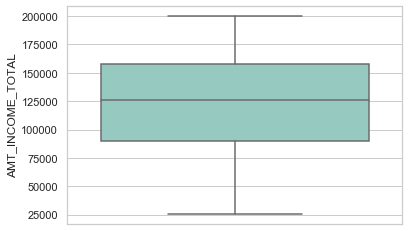

In [73]:
df_income=df_income.filter(df_income['AMT_INCOME_TOTAL']<200000)
ax=sns.boxplot(y=df_income.toPandas()["AMT_INCOME_TOTAL"],palette='Set3')


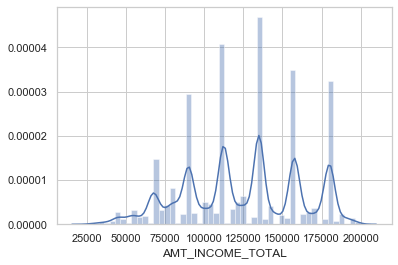

In [74]:
#sns.kdeplot(df_income.toPandas()["AMT_INCOME_TOTAL"], shade=True)
#plt.hist(df_income.toPandas()["AMT_INCOME_TOTAL"], density=True, alpha=0.5)
sns.distplot(df_income.toPandas()["AMT_INCOME_TOTAL"])

As seen in the plot, we need to assign a cut off range in terms of annual income below 200000.

In [75]:
df=df.filter(df["AMT_INCOME_TOTAL"]<200000)

In [76]:
df.count()

219578

In [77]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.71 of whole dataset


AMT_CREDIT: Credit amount of the loan

In [78]:
df_credit=df.select('AMT_CREDIT')
df_credit.describe().show()

+-------+------------------+
|summary|        AMT_CREDIT|
+-------+------------------+
|  count|            219578|
|   mean|515054.34125914256|
| stddev|  341663.391627658|
|    min|           45000.0|
|    max|         2980521.0|
+-------+------------------+



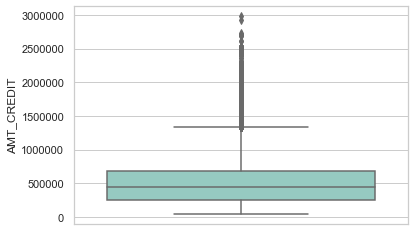

In [79]:
ax=sns.boxplot(y=df_credit.toPandas()["AMT_CREDIT"],palette='Set3')


In [80]:
df_credit=df_credit.filter(df_credit['AMT_CREDIT']<1300000)

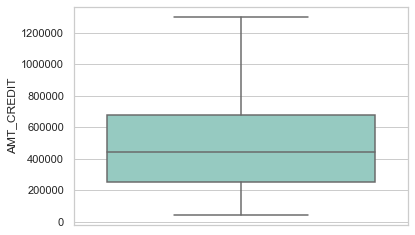

In [81]:
ax=sns.boxplot(y=df_credit.toPandas()["AMT_CREDIT"],palette='Set3')

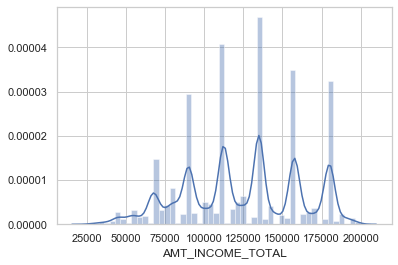

In [82]:
sns.distplot(df_income.toPandas()["AMT_INCOME_TOTAL"])

In terms of cledit loan we will consider the amount less then 1300000.

In [83]:
df=df.filter(df['AMT_CREDIT']<1300000)

In [84]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.69 of whole dataset


AMT_ANNUITY: Loan Annuity 

An annuity is a series of payments made at equal intervals.Examples of annuities are regular deposits to a savings account, monthly home mortgage payments, monthly insurance payments and pension payments. Annuities can be classified by the frequency of payment dates. The payments (deposits) may be made weekly, monthly, quarterly, yearly, or at any other regular interval of time.

In [85]:
df_annuity=df.select('AMT_ANNUITY')

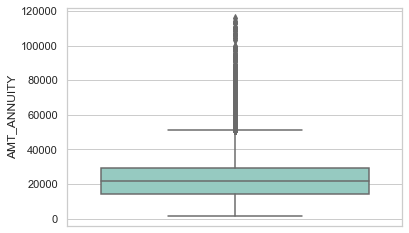

In [86]:
ax=sns.boxplot(y=df_annuity.toPandas()['AMT_ANNUITY'], palette='Set3')

In [87]:
df_annuity.describe().show()

+-------+------------------+
|summary|       AMT_ANNUITY|
+-------+------------------+
|  count|            213059|
|   mean| 22848.05156318203|
| stddev|10842.304064524056|
|    min|            1615.5|
|    max|          115803.0|
+-------+------------------+



In [88]:
df_annuity=df_annuity.filter(df_annuity['AMT_ANNUITY']<50000)

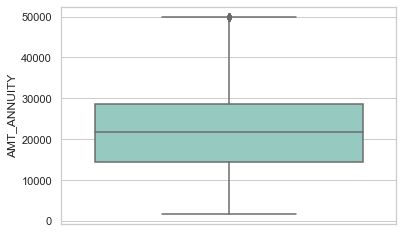

In [89]:
ax=sns.boxplot(y=df_annuity.toPandas()['AMT_ANNUITY'], palette='Set3')

In [90]:
df=df.filter(df['AMT_ANNUITY']<50000)

In [91]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.68 of whole dataset


NAME_INCOME_TYPE: Client income type (bussinessman, working, maternity leave)

In [92]:
df.select('NAME_INCOME_TYPE').distinct().show()

+--------------------+
|    NAME_INCOME_TYPE|
+--------------------+
|             Student|
|Commercial associate|
|         Businessman|
|     Maternity leave|
|       State servant|
|             Working|
|           Pensioner|
|          Unemployed|
+--------------------+



In [93]:
INC_TYPE_indexer=StringIndexer(inputCol='NAME_INCOME_TYPE', outputCol='INCOME_TYPE').fit(df)
df=INC_TYPE_indexer.transform(df)
df.select('NAME_INCOME_TYPE','INCOME_TYPE').distinct().show()

+--------------------+-----------+
|    NAME_INCOME_TYPE|INCOME_TYPE|
+--------------------+-----------+
|             Student|        5.0|
|Commercial associate|        2.0|
|           Pensioner|        1.0|
|          Unemployed|        4.0|
|             Working|        0.0|
|     Maternity leave|        6.0|
|       State servant|        3.0|
|         Businessman|        7.0|
+--------------------+-----------+



In [94]:
INCOME_TYPE_encoder=OneHotEncoder(inputCol="INCOME_TYPE", outputCol="INCOME_TYPE_Vector")
df = INCOME_TYPE_encoder.transform(df)
df.select('NAME_INCOME_TYPE','INCOME_TYPE','INCOME_TYPE_Vector').distinct().show()

+--------------------+-----------+------------------+
|    NAME_INCOME_TYPE|INCOME_TYPE|INCOME_TYPE_Vector|
+--------------------+-----------+------------------+
|          Unemployed|        4.0|     (7,[4],[1.0])|
|             Working|        0.0|     (7,[0],[1.0])|
|         Businessman|        7.0|         (7,[],[])|
|     Maternity leave|        6.0|     (7,[6],[1.0])|
|             Student|        5.0|     (7,[5],[1.0])|
|           Pensioner|        1.0|     (7,[1],[1.0])|
|       State servant|        3.0|     (7,[3],[1.0])|
|Commercial associate|        2.0|     (7,[2],[1.0])|
+--------------------+-----------+------------------+



NAME_EDUCATION_TYPE: Level of highest education the client achived


In [95]:
df.select('NAME_EDUCATION_TYPE').distinct().show()

+--------------------+
| NAME_EDUCATION_TYPE|
+--------------------+
|     Academic degree|
|   Incomplete higher|
|Secondary / secon...|
|     Lower secondary|
|    Higher education|
+--------------------+



In [96]:
EDU_TYPE_indexer=StringIndexer(inputCol='NAME_EDUCATION_TYPE', outputCol='EDU_TYPE').fit(df)
df=EDU_TYPE_indexer.transform(df)
df.select('NAME_EDUCATION_TYPE','EDU_TYPE').distinct().show()

+--------------------+--------+
| NAME_EDUCATION_TYPE|EDU_TYPE|
+--------------------+--------+
|     Academic degree|     4.0|
|     Lower secondary|     3.0|
|   Incomplete higher|     2.0|
|    Higher education|     1.0|
|Secondary / secon...|     0.0|
+--------------------+--------+



In [97]:
EDU_TYPE_encoder=OneHotEncoder(inputCol="EDU_TYPE", outputCol="EDU_TYPE_Vector")
df = EDU_TYPE_encoder.transform(df)

NAME_FAMILY_STATUS: Family status of client

In [98]:
df.select('NAME_FAMILY_STATUS').distinct().show()

+--------------------+
|  NAME_FAMILY_STATUS|
+--------------------+
|           Separated|
|             Married|
|Single / not married|
|               Widow|
|      Civil marriage|
+--------------------+



In [99]:
FAMILY_indexer=StringIndexer(inputCol='NAME_FAMILY_STATUS', outputCol='FAMILY').fit(df)
df=FAMILY_indexer.transform(df)
df.select('NAME_FAMILY_STATUS','FAMILY').distinct().show()

+--------------------+------+
|  NAME_FAMILY_STATUS|FAMILY|
+--------------------+------+
|      Civil marriage|   2.0|
|               Widow|   4.0|
|           Separated|   3.0|
|Single / not married|   1.0|
|             Married|   0.0|
+--------------------+------+



In [100]:
FAMILY_encoder=OneHotEncoder(inputCol="FAMILY", outputCol="FAMILY_Vector")
df = FAMILY_encoder.transform(df)

NAME_HOUSING_TYPE:What is the housing situation of the client (renting, living with parents, etc...)


In [101]:
df.select('NAME_HOUSING_TYPE').distinct().show()

+-------------------+
|  NAME_HOUSING_TYPE|
+-------------------+
|  House / apartment|
|Municipal apartment|
|    Co-op apartment|
|   Rented apartment|
|   Office apartment|
|       With parents|
+-------------------+



In [102]:
HOUS_TYPE_indexer=StringIndexer(inputCol='NAME_HOUSING_TYPE', outputCol='HOUSE_TYPE').fit(df)
df=HOUS_TYPE_indexer.transform(df)
df.select('NAME_HOUSING_TYPE','HOUSE_TYPE').distinct().show()

+-------------------+----------+
|  NAME_HOUSING_TYPE|HOUSE_TYPE|
+-------------------+----------+
|  House / apartment|       0.0|
|       With parents|       1.0|
|   Office apartment|       4.0|
|Municipal apartment|       2.0|
|   Rented apartment|       3.0|
|    Co-op apartment|       5.0|
+-------------------+----------+



In [103]:
HOUSE_TYPE_encoder=OneHotEncoder(inputCol="HOUSE_TYPE", outputCol="HOUSE_TYPE_Vector")
df = HOUSE_TYPE_encoder.transform(df)

DAYS_BIRTH: Client's age in days at the time of application

In [104]:
df.select('DAYS_BIRTH').show() #Days of the year is 365.25

+----------+
|DAYS_BIRTH|
+----------+
|    -19046|
|    -19005|
|    -19932|
|    -16941|
|    -20099|
|    -14469|
|    -10197|
|    -20417|
|    -13439|
|    -14583|
|     -8728|
|    -12931|
|     -9776|
|    -17718|
|    -11348|
|    -18252|
|    -24827|
|    -11286|
|    -19334|
|    -18724|
+----------+
only showing top 20 rows



Age values are given in terms of days and in minus value, we need to convert them to reasonable age data.

In [105]:
import pyspark.sql.functions as func

In [106]:
df=df.withColumn('AGE',func.round(-df.DAYS_BIRTH/365,0).cast('integer'))

In [107]:
df_AGE=df.select('AGE')
df_AGE.describe().show()

+-------+------------------+
|summary|               AGE|
+-------+------------------+
|  count|            208878|
|   mean|  44.2272953590134|
| stddev|12.476177733395613|
|    min|                21|
|    max|                69|
+-------+------------------+



All age values seems relevant and can be used through the analysis.

DAYS_EMPLOYED: How many days before the application the person started current employement


In [108]:
df=df.withColumn('YEAR_EMP',func.round(-df.DAYS_EMPLOYED/365,0).cast('integer'))

In [109]:
df_YEAR_EMPLOYED=df.select('YEAR_EMP')
df_YEAR_EMPLOYED.describe().show()

+-------+-------------------+
|summary|           YEAR_EMP|
+-------+-------------------+
|  count|             208878|
|   mean|-206.96514711937112|
| stddev|  411.5876931161294|
|    min|              -1001|
|    max|                 49|
+-------+-------------------+



In the dataset we have some values as 365243 which do not correspond with the other values.


In [110]:
df.filter(df['DAYS_EMPLOYED']==365243).count()/df.count()

0.21175039975488083

%21 of whole data has same value, dropping them will cause a significant loss of data. Rather then dropping them we will deal with assigning a mean value what the rest of the data has.

In [111]:
df.filter(df['DAYS_EMPLOYED']<0).toPandas()['DAYS_EMPLOYED'].mean()/365.25

-6.33562582566228

We need to apply conditional assignment based on the value. 

In [112]:
from pyspark.sql.functions import col, when

In [114]:
df=df.withColumn("YEAR_EMP", when(col('DAYS_EMPLOYED')<0,func.round(-df.DAYS_EMPLOYED/365,0).cast('integer')).otherwise(6))

If employed days has negative value then it will be assigned as 6 years by default. 

In [115]:
df.select('YEAR_EMP').describe().show()

+-------+-----------------+
|summary|         YEAR_EMP|
+-------+-----------------+
|  count|           208878|
|   mean|6.267562883597123|
| stddev|5.693776504143547|
|    min|                0|
|    max|               49|
+-------+-----------------+



Now, all values seem reasonable.

OWN_CAR_AGE has only 0 and value so we will disregard this data

FLAG_MOBIL; 
FLAG_EMP_PHONE; 
FLAG_WORK_PHONE; 
FLAG_PHONE; 

All be used as is since they are designated as 0 and 1 as integer.


OCCUPATION_TYPE is given as numbers, we can't use them since they are not defined. So we will desregard this data as well.


CNT_FAM_MEMBERS; 
REGION_RATING_CLIENT; 
REGION_RATING_CLIENT_W_CITY; 
REG_REGION_NOT_LIVE_REGION; 
REG_REGION_NOT_WORK_REGION; 

Values will be used as is with 0 and 1 values. 


In [116]:
df.select('ORGANIZATION_TYPE').distinct().count()

58

There are too much distict values, so for the machine learning algorithm it will not create a significant difference, and inputting data will be diffucult. For a seperate project it can be reduced and aggregated to common organization types.

In [117]:
df.select('FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5').distinct().show()


+---------------+---------------+---------------+---------------+
|FLAG_DOCUMENT_2|FLAG_DOCUMENT_3|FLAG_DOCUMENT_4|FLAG_DOCUMENT_5|
+---------------+---------------+---------------+---------------+
|              0|              0|              0|              1|
|              0|              0|              0|              0|
|              1|              0|              0|              0|
|              0|              0|              1|              0|
|              0|              1|              0|              0|
+---------------+---------------+---------------+---------------+



In [118]:
df.select('FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10').distinct().show()

+---------------+---------------+---------------+---------------+----------------+
|FLAG_DOCUMENT_6|FLAG_DOCUMENT_7|FLAG_DOCUMENT_8|FLAG_DOCUMENT_9|FLAG_DOCUMENT_10|
+---------------+---------------+---------------+---------------+----------------+
|              0|              0|              0|              0|               0|
|              1|              0|              0|              1|               0|
|              0|              1|              0|              0|               0|
|              0|              0|              1|              0|               0|
|              1|              0|              0|              0|               0|
|              0|              0|              0|              1|               0|
+---------------+---------------+---------------+---------------+----------------+



In [119]:
df.select('FLAG_DOCUMENT_2').toPandas()['FLAG_DOCUMENT_2'].unique()

array([0, 1], dtype=int64)

* Spark SQL distinct function and Pandas unique function are not giving the same results. 

In [120]:
#df.toPandas().to_csv('E:/BDA 105/Files/Data_Fnl.csv')

## Assembling Data

We need to assemble all of the input columns into a
single vector that would act as the input feature for the model. So, we select the input columns that we need to use to create the single
feature vector and name the output vector as features.

In [121]:
df_assembler = VectorAssembler(inputCols=['NCT_Vector','GENDER_Vector','CAR_Vector','HOUSE_Vector','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
        'INCOME_TYPE_Vector','EDU_TYPE_Vector','FAMILY_Vector','HOUSE_TYPE_Vector','AGE','YEAR_EMP','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION',
        'REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9'],outputCol='features')

In [122]:
df = df_assembler.transform(df)

In [123]:
df.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- OWN_CAR_AGE: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_EMP_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_CONT_MOBILE: integer (nullable = true)
 |-- FLAG_PHONE: double (nullable = true)
 |-- OCCUPATION_TYPE: integer (nul

As we can see, now we have one extra column named features, which
is nothing but a combination of all the input features represented as a
single dense vector.

In [124]:
df.select(['features','TARGET']).show()

+--------------------+------+
|            features|TARGET|
+--------------------+------+
|(47,[3,5,6,7,8,15...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,2,3,5,6,7,...|     0|
|(47,[0,2,3,5,6,7,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[2,3,5,6,7,8,...|     0|
|(47,[0,1,2,3,4,5,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,3,5,6,7,8,...|     0|
|(47,[0,2,5,6,7,8,...|     0|
|(47,[1,2,3,4,5,6,...|     0|
|(47,[1,2,3,5,6,7,...|     0|
|(47,[0,1,2,3,4,5,...|     0|
|(47,[3,5,6,7,8,15...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,4,5,6,7,8,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     1|
+--------------------+------+
only showing top 20 rows



Let us select only features column as input and the TARGET column as
output for training the logistic regression model.

## Splitting the Dataset

We have to split the dataset into a training and test dataset in order to train
and evaluate the performance of the logistic regression model. We split it
in a 65/35 ratio and train our model on 65% of the dataset. Another use of
splitting the data is that we can use 65% of the data to apply cross-validation
in order to come up with the best Hyperparameters. 

In [147]:
model_df=df.select(['features','TARGET'])

In [148]:
training_df,test_df=model_df.randomSplit([0.65,0.35])

In [167]:
training_df.count()

135868

In [168]:
training_df.groupBy('TARGET').count().show()

+------+------+
|TARGET| count|
+------+------+
|     1| 11597|
|     0|124271|
+------+------+



In [169]:
test_df.count()

73010

In [170]:
test_df.groupBy('TARGET').count().show()

+------+-----+
|TARGET|count|
+------+-----+
|     1| 6259|
|     0|66751|
+------+-----+



In [171]:
df.groupBy('TARGET').count().show()

+------+------+
|TARGET| count|
+------+------+
|     1| 17856|
|     0|191022|
+------+------+



# Spark MLlib Applications

Spark MLlib

This component is used for building Machine Learning Models on Big
Data in a distributed manner. The traditional technique of building
ML models using Python’s scikit learn library faces lot of challenges
when data size is huge whereas MLlib is designed in a way that offers
feature engineering and machine learning at scale. MLlib has most of
the algorithms implemented for classification, regression, clustering,
recommendation system, and natural language processing.

In [149]:
from pyspark.ml.classification import LogisticRegression

In [150]:
from pyspark.ml.classification import RandomForestClassifier

# Building Logistic Regression Model to Final Dataset

Logistic regression is used for classification problems based on Probability which is defined as the chances of occurrence of a desired
event or interested outcomes upon all possible outcomes.

In [151]:
log_reg=LogisticRegression(labelCol='TARGET').fit(training_df)

In [152]:
train_results=log_reg.evaluate(training_df).predictions

In [153]:
train_results.filter(train_results['TARGET']==0).filter(train_results['prediction']==0).select(['TARGET','prediction','probability']).show(10,False)

+------+----------+----------------------------------------+
|TARGET|prediction|probability                             |
+------+----------+----------------------------------------+
|0     |0.0       |[0.8853322246996335,0.11466777530036645]|
|0     |0.0       |[0.902767327298154,0.0972326727018459]  |
|0     |0.0       |[0.9005322632772319,0.09946773672276811]|
|0     |0.0       |[0.9081084234097611,0.091891576590239]  |
|0     |0.0       |[0.9051980256028649,0.09480197439713513]|
|0     |0.0       |[0.9287604296327177,0.0712395703672823] |
|0     |0.0       |[0.9206004452700992,0.07939955472990083]|
|0     |0.0       |[0.9120315430019927,0.08796845699800725]|
|0     |0.0       |[0.9222984517314916,0.0777015482685083] |
|0     |0.0       |[0.9165174290817767,0.08348257091822323]|
+------+----------+----------------------------------------+
only showing top 10 rows



We can access the predictions made by the model using the evaluate
function in Spark that executes all the steps in an optimized way. That
gives another Dataframe that contains four columns in total, including
prediction and probability. The prediction column signifies the class
label that the model has predicted for the given row and probability
column contains two probabilities

In [154]:
results=log_reg.evaluate(test_df).predictions

In [155]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [156]:
results.select(['TARGET','prediction']).show()

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



Confusion Matrix 

We will manually create the variables for true positives, true negatives,
false positives, and false negatives to understand them better rather than
using the direct inbuilt function.

In [157]:
tp = results[(results.TARGET == 1) & (results.prediction== 1)].count()
tn = results[(results.TARGET == 0) & (results.prediction== 0)].count()
fp = results[(results.TARGET == 0) & (results.prediction== 1)].count()
fn = results[(results.TARGET == 1) & (results.prediction== 0)].count()

In [158]:
print(tp,tn,fp,fn)

2 66750 1 6257


Accuracy

Accuracy is the most basic metric for evaluating any classifier; however, this is not the right indicator of
the performance of the model due to dependency on the target class balance.

In [159]:
accuracy=float((tp+tn) /(results.count()))
print(accuracy)

0.9142857142857143


Recall

Recall rate shows how much of the positive class cases we are able to
predict correctly out of the total positive class observations.

In [160]:
recall = float(tp/(tp + fn))
print(recall)

0.00031953986259785906


Precision

Precision rate talks about the number of true positives predicted correctly out of all the predicted positives observations.

In [161]:
precision = float(tp) / (tp +fp)
print(precision)

0.6666666666666666


In [162]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Build and Train Random Forest Model

 A decision tree falls under the supervised category of machine learning
and uses frequency tables for making the predictions. One advantage of a
decision tree is that it can handle both categorical and numerical variables.

As the name suggests, random forests are made up of many trees: a
lot of decision trees. They are quite popular and sometimes are the go-to
method for supervised machine learning. Random forests can also be
used for classification and regression.

In [172]:
rf_classifier=RandomForestClassifier(labelCol='TARGET',numTrees=50).fit(training_df)

We build and train the random forest model using features
such as input and Status as the output colum. There are many hyperparameters that can be set to tweak the
performance of the model, but we are chosing the deafault ones here
except for one that is the number of decision trees that we want to build.

In [173]:
rf_predictions=rf_classifier.transform(test_df)

In [174]:
rf_predictions.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(47,[0,1,2,3,4,5,...|     0|[45.0328952476073...|[0.90065790495214...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.5674739024310...|[0.91134947804862...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.6144565681897...|[0.91228913136379...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.1282596285064...|[0.90256519257012...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.5460087609593...|[0.91092017521918...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.5354332800193...|[0.91070866560038...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.6903421365444...|[0.91380684273088...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.6218943293139...|[0.91243788658628...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.1961860199485...|[0.90392372039897...|       0.0|
|(47

The first column in the predictions table is that of input features of the
test data. The second column is the actual label or output of the test data.
The third column (rawPrediction) represents the measure of confidence
for both possible outputs. The fourth column is that of conditional
probability of each class label, and the final column is the prediction by the
random forest classifier.

In [176]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [177]:
rf_accuracy=MulticlassClassificationEvaluator(labelCol='TARGET',metricName='accuracy').evaluate(rf_predictions)

In [178]:
print('The accuracy of RF on test data is {0:.0%}'.format(rf_accuracy))

The accuracy of RF on test data is 91%


In [179]:
rf_precision=MulticlassClassificationEvaluator(labelCol='TARGET',metricName='weightedPrecision').evaluate(rf_predictions)

In [180]:
print('The precision rate on test data is {0:.0%}'.format(rf_precision))

The precision rate on test data is 84%


In [181]:
rf_classifier.featureImportances

SparseVector(47, {0: 0.0034, 1: 0.0389, 2: 0.001, 4: 0.008, 5: 0.0131, 6: 0.026, 7: 0.0115, 8: 0.0643, 9: 0.0722, 10: 0.001, 11: 0.0013, 12: 0.0162, 14: 0.0013, 15: 0.023, 16: 0.0639, 17: 0.0005, 18: 0.0028, 19: 0.0036, 20: 0.0117, 21: 0.0018, 22: 0.0018, 23: 0.0014, 24: 0.016, 25: 0.0029, 26: 0.0026, 27: 0.0018, 28: 0.111, 29: 0.1603, 30: 0.1478, 31: 0.0307, 32: 0.0009, 33: 0.0031, 34: 0.0615, 35: 0.0014, 37: 0.0007, 38: 0.047, 40: 0.0, 41: 0.0424, 46: 0.0013})

We used five features and the importance can be found out using the
feature importance function. To know which input feature is mapped to
which index values, we can use metadata information.

In [182]:
df.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 4, 'name': 'CNT_CHILDREN'},
  {'idx': 5, 'name': 'AMT_INCOME_TOTAL'},
  {'idx': 6, 'name': 'AMT_CREDIT'},
  {'idx': 7, 'name': 'AMT_ANNUITY'},
  {'idx': 28, 'name': 'AGE'},
  {'idx': 29, 'name': 'YEAR_EMP'},
  {'idx': 30, 'name': 'FLAG_MOBIL'},
  {'idx': 31, 'name': 'FLAG_EMP_PHONE'},
  {'idx': 32, 'name': 'FLAG_WORK_PHONE'},
  {'idx': 33, 'name': 'FLAG_CONT_MOBILE'},
  {'idx': 34, 'name': 'CNT_FAM_MEMBERS'},
  {'idx': 35, 'name': 'REGION_RATING_CLIENT'},
  {'idx': 36, 'name': 'REGION_RATING_CLIENT_W_CITY'},
  {'idx': 37, 'name': 'REG_REGION_NOT_WORK_REGION'},
  {'idx': 38, 'name': 'REG_REGION_NOT_LIVE_REGION'},
  {'idx': 39, 'name': 'FLAG_DOCUMENT_2'},
  {'idx': 40, 'name': 'FLAG_DOCUMENT_3'},
  {'idx': 41, 'name': 'FLAG_DOCUMENT_4'},
  {'idx': 42, 'name': 'FLAG_DOCUMENT_5'},
  {'idx': 43, 'name': 'FLAG_DOCUMENT_6'},
  {'idx': 44, 'name': 'FLAG_DOCUMENT_7'},
  {'idx': 45, 'name': 'FLAG_DOCUMENT_8'},
  {'idx': 46, 'name': 'FLAG_DOCUMENT_9'}],
 'binary': [{'idx': 0,

In feature imprtance analysis we obtain, the most importnant numerical value is CNT_CHILDREN and most importnat binary featue is GENDER_Vector_F. 

# Conclusion


Machine Learning is the mechanism through which we try to make machines learn without explicitly programming them to do so. Machine Learning is one of the most talked about topics in the last few years. More and more businesses want to adopt it to maintain the competitive edge; however, very few really have the right resources and the appropriate data to implement it.

In this project, we implemented building blocks of logistic regression and random forest, converting categorical columns into numerical features, and building a logistic regression model from scratch using PySpark.

Data processing is a critical step required to perform Machine Learning as we need to clean, filter, merge, and transform our data to bring it to the desired form so that we are able to train Machine Learning models. As seen in project, most of the effort are shown in data processing while implementing feature engineering and data cleaning. 

After retrieving a desired dataset, we have implemented the pyspark ML libraries. Model Evaluation parameters such as Accuracy and Precisions showed that the trained data gave over %90 result on test data, so we can consider the model built is reasonable and can be implemented on selected case. 


# Bibliography

* Li, S. (n.d.). Towards Data Science. Retrieved from https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa
* Meyer, J. (n.d.). Caffeine-Powered Life. Retrieved from Random Forests with PySpark: https://jarrettmeyer.com/2017/05/04/random-forests-with-pyspark
* Singh, P. (n.d.). Machine Learning with PySpark. APRESS.
* Spark. (n.d.). Spark Documentation. Retrieved from Classification and regression: https://spark.apache.org/docs/latest/ml-classification-regression.html
* Spark, A. (n.d.). Spark Documentation. Retrieved from ML Tuning: model selection and hyperparameter tuning: https://spark.apache.org/docs/2.2.0/ml-tuning.html


    
    